# Graph Email Project

Just a project for myself. No initial idea where this takes me. Maybe a graph neural network in the end. Source of data: https://snap.stanford.edu/data/email-EuAll.html 

In [1]:
import numpy as np
import pandas as pd
from py2neo import Graph, Relationship, Node

In [2]:
graph = Graph("bolt://localhost:11009", name="emails", password="emails")

In [3]:
graph

<Graph database=<Database uri='bolt://localhost:11009' secure=False user_agent='py2neo/4.3.0 neobolt/1.7.17 Python/3.7.5-final-0 (win32)'> name='emails'>

In [4]:
edges_file = open("Email-EuAll.txt", "r")
edges = edges_file.readlines()

In [5]:
edges[2].split()

['#', 'Nodes:', '265214', 'Edges:', '420045']

In [6]:
nodeset = set()

In [7]:
for elem in edges[4:]:
    a = elem.split()[0]
    b = elem.split()[1]
    
    nodeset.add(a)
    nodeset.add(b)

In [8]:
j = 0

In [16]:
# Asserting that nodes are unique

query = """
CREATE CONSTRAINT idconstraint IF NOT EXISTS
ON (n:entity)
ASSERT n.id IS UNIQUE
"""

graph.run(query)

In [102]:
for elem in nodeset:
    graph.run("MERGE (a:entity {id:'" + str(elem) + "'})")
    j += 1
    if j % 1000 == 0:
        print(j)

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000
100000
101000
102000
103000
104000
105000
106000
107000
108000
109000
110000
111000
112000
113000
114000
115000
116000
117000
118000
119000
120000
121000
122000
123000
124000
125000
126000
127000
128000
129000
130000
131000
132000
133000
134000
135000
136000
137000
138000
139000
140000
141000
142000
143000
144000
145000
146000
147000
148000
149000
150000
151000
152000
153000
154000
155000
156000
157000
158000
15

In [12]:
for elem in edges[4:]:
    a = elem.split()[0]
    b = elem.split()[1]
    
    c = "MATCH (m {id:'" + str(a) + "'}) "
    d = "MATCH (n {id:'" + str(b) + "'}) "
    e = "MERGE (m)-[:EMAIL]->(n)"
    f = c + d + e
    graph.run(f)
    
    j += 1
    if j % 1000 == 0:
        print(j)

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000
100000
101000
102000
103000
104000
105000
106000
107000
108000
109000
110000
111000
112000
113000
114000
115000
116000
117000
118000
119000
120000
121000
122000
123000
124000
125000
126000
127000
128000
129000
130000
131000
132000
133000
134000
135000
136000
137000
138000
139000
140000
141000
142000
143000
144000
145000
146000
147000
148000
149000
150000
151000
152000
153000
154000
155000
156000
157000
158000
15

# Exploring the Data!

In [9]:
outs, ins = [], [];

for elem in edges[4:]:
    a = elem.split()[0]
    b = elem.split()[1]
    outs.append(a)
    ins.append(b)

In [10]:
outs = pd.DataFrame(outs)
outs.columns = ['From']
ins = pd.DataFrame(ins)
ins.columns = ['To']

In [11]:
outdegrees = outs['From'].value_counts()
indegrees = ins['To'].value_counts()

In [14]:
outdegrees

83        930
868       871
192       854
2371      811
10        761
         ... 
190217      1
79871       1
142721      1
35113       1
230449      1
Name: From, Length: 225409, dtype: int64

In [15]:
indegrees

179170    7631
422       6249
30        5949
72        4306
298       3945
          ... 
227710       1
48752        1
123894       1
138867       1
230449       1
Name: To, Length: 74660, dtype: int64

We have a clear discrepancy. Some research institutes get a lot more as input than others send as output. 

# Some graph stuff

In [8]:
graph.run("CALL gds.graph.create('myGraph', 'entity', 'EMAIL')")

So, at first we create an in-memory graph. This will be used a lot later. 

# PageRank: Who are "the most important" ones in the graph?

In [22]:
# Page Rank
query = """
CALL gds.pageRank.write('myGraph', {
    maxIterations: 25,
    dampingFactor: 0.85, 
    writeProperty: 'pageRank'
})
YIELD nodePropertiesWritten, ranIterations
"""

pR = graph.run(query).to_data_frame()

In [23]:
pR

,nodePropertiesWritten,ranIterations
0,265214,25


In this case, the  PageRank kinda refers to the nodes who get the most input in terms of incoming emails. 

In [10]:
query = """
MATCH (n:entity)
RETURN n.id
ORDER BY n.pageRank DESC
LIMIT 5
"""

top5pr = graph.run(query).to_data_frame()
top5pr

,n.id
0,422
1,30
2,310
3,179170
4,485


# Betweenness score: Which nodes are very important to pass a lot of information through the network? Who are at the "bridges" to send messages through the network?

In [27]:
# Betweenness score
query = """
CALL gds.betweenness.write('myGraph', {
    writeProperty: 'betweenness'
})
YIELD centralityDistribution, nodePropertiesWritten
RETURN centralityDistribution.min AS minimumScore, centralityDistribution.mean AS meanScore, nodePropertiesWritten
"""

bC = graph.run(query).to_data_frame()
bC

,minimumScore,meanScore,nodePropertiesWritten
0,0.0,116657.680172,265214


Note that nodes with a high betweenness score are not necessarily the ones with a high node degree. The "condition" is that they lie on a lot of "shortest path" routes.

In [11]:
query = """
MATCH (n:entity)
RETURN n.id
ORDER BY n.betweenness DESC
LIMIT 5
"""

top5b = graph.run(query).to_data_frame()
top5b

,n.id
0,1011
1,10
2,685
3,911
4,192


In [20]:
for elem in top5b['n.id']:
    a = "MATCH (n:entity) "
    b = "WHERE n.id = '" + str(elem) + "' "
    c = "WITH n as t5b "
    d = "MATCH (t5b)-[:EMAIL]->(m) "
    e = "RETURN COUNT(*) AS t5bedges "
    f = a + b + c + d + e
    
    bbb = graph.run(f).to_data_frame().values[0][0]
    print(bbb) 

357
761
348
300
854


Here's something interesting to discover. 
1. Even though it is not _necessary_ that nodes with high betweenness scores have high outdegrees, in this case they are all located at the upper end. 
2. The reasoning for that is probably that due to a dispersed network, only a handful nodes with a very high outdegree lie on the shortet path route. 
3. Also, it is still noticable that a high betweenness score is not necessarily related to a high outdegree. 

# Which have a high closeness centrality? That is, which nodes are important to pass information quickly to a lot of people in short time? 

In [29]:
query= """
CALL gds.alpha.closeness.write('myGraph', {
    writeProperty: 'centrality'
})
YIELD nodes, writeProperty
"""

cc = graph.run(query).to_data_frame()

cc

,nodes,writeProperty
0,265214,centrality


In [22]:
query = """
MATCH (n:entity)
RETURN n.id
ORDER BY n.centrality DESC
LIMIT 5
"""

top5c = graph.run(query).to_data_frame()
top5c

,n.id
0,147828
1,35635
2,21827
3,14183
4,115043


Also, notice here that these are not the same as the ones with the high betweenness centrality. Then, let's also check how many people they are contacting. 

In [26]:
for elem in top5c['n.id']:
    a = "MATCH (n:entity) "
    b = "WHERE n.id = '" + str(elem) + "' "
    c = "WITH n as t5c "
    d = "MATCH (t5c)-[:EMAIL]->(m) "
    e = "RETURN COUNT(*) AS t5cedges "
    f = a + b + c + d + e
    
    ccc = graph.run(f).to_data_frame().values[0][0]
    print(ccc)

48
5
7
14
1


As it turns out, not that many either! However, that is not a contradiction, although I would have expected something else. 

Possible reasons: 
1. The nodes high on betweenness are part of sparse, dislocated networks. Therefore, they only pass on messages to many, but single nodes. 
2. The nodes high on closeness centrality are part of very, very dense networks. Therefore, they are high on closeness centrality and could therefore, once they send a message, give a lot of information through the network. 

# How many islands are there? And how many people are there in every island? 

In [44]:
query = """
CALL gds.wcc.write('myGraph', {writeProperty: 'componentId'})
YIELD nodePropertiesWritten, componentCount;
"""

wccs = graph.run(query).to_data_frame()
print(wccs)

   nodePropertiesWritten  componentCount
0                 265214           15836


We now know that there are 15836 islands. In other words, 15836 weakly connected components. Now, let us check how many members each island has. As of now, we would expect a highly right-skewed distribution. That is, many islands with only a few nodes but a few islands with a lot of nodes. 

In [27]:
islandMembers = []

for i in range(1, 15837):
    a = "MATCH (n:entity)"
    b = " WHERE n.componentId = " +  str(i)
    c = " RETURN COUNT(*) AS nums"
    d = a + b + c
    
    e = graph.run(d).to_data_frame().values[0][0]
    islandMembers.append(e)
    
    if i % 1000 == 0:
        print(i)

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000


In [39]:
iM = pd.DataFrame(islandMembers)
iM.columns = ['Members']
iM['Members'].value_counts()

0       13792
2        1513
3         235
4          89
5          49
6          26
7          22
1          16
8          14
9          12
10          8
11          8
12          6
22          5
17          4
14          3
20          3
24          3
19          3
21          3
18          2
16          2
25          2
23          2
15          2
13          2
1850        1
27          1
43          1
45          1
1373        1
40          1
38          1
62          1
86          1
35          1
Name: Members, dtype: int64

(array([1.5834e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([   0.,  185.,  370.,  555.,  740.,  925., 1110., 1295., 1480.,
        1665., 1850.]),
 <a list of 10 Patch objects>)

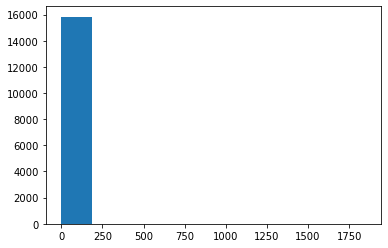

In [56]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(islandMembers)

# Biggest complete graph

# Number of communities

In [42]:
query = """
CALL gds.louvain.stats('myGraph')
YIELD communityCount
"""

coms = graph.run(query).to_data_frame().values[0][0]
coms

37397

So, this gives us (roughly) 37,400 communities. Naturally, that number is bigger than the number of islands, since each island can consist of several communities. Also, we have to take into consideration that the number of communities the Louvain count gives is stochastic, not deterministic:

In [43]:
def louvain_coms(runs=5):
    coms = []
    for _ in range(runs):
        query = """
        CALL gds.louvain.stats('myGraph')
        YIELD communityCount
        """
        
        coms.append(graph.run(query).to_data_frame().values[0][0])
        
    return coms

In [44]:
severalruns = louvain_coms(runs=50)
severalruns

[40763,
 37397,
 37386,
 37379,
 40761,
 37385,
 37383,
 37380,
 37406,
 37380,
 37398,
 37379,
 37386,
 37386,
 40753,
 37392,
 37376,
 40752,
 40743,
 37372,
 37392,
 37384,
 37399,
 37397,
 37368,
 37382,
 37383,
 37399,
 37378,
 37378,
 37388,
 37393,
 37386,
 37391,
 37374,
 37392,
 40748,
 37400,
 37394,
 37374,
 37370,
 37384,
 37398,
 37395,
 37387,
 37397,
 37382,
 40755,
 37400,
 37381]

# Biggest Complete Graph

In [45]:
# Still don't know how to do, needs some time to figure out. 

# Triangles

In [46]:
# TriangleCount not possible yet, due to the usage of directed relationships.